In [1]:
# INTRODUCTION (FLAT MATTER UNIVERSE)

In [2]:
#1.1 Finding ages of the flat matter universe at different sizes

# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)
H0y = H0s * 3.154e7 * 1.e9 # H0 in inverse Giga years is H0 in inverse seconds * (3.154e7 seconds/year) * (1e9 years / Giga year)
print('Hubble time = ',1/H0y,'Gyr')

# Let's format that to a more appropriate number of significant figures.  
# The first % means put the variable here.  The .2f means make it a float with 2 decimal places.
print('Hubble time = %.2f Gyr'%(1/H0y))

Hubble time =  13.976165695516954 Gyr
Hubble time = 13.98 Gyr


In [3]:
# Write a function for the integrand, i.e. 1/˙a1/a˙1/\dot{a} (adot inverse)
# I'm going to keep the constant H_0 outside the integral and add it later.
def adotinv_flatmatter(a):
    return np.sqrt(a) 

# First note some weird python notation, if you say "x, y = 1, 2" it's the same as saying "x=1" and "y=2".

# Now integrate that equation from scalefactor 0 to 1 (as an example) which will give the age of the universe today (because we define a so that a=1 today):
age_Hubble, uncert = integrate.quad(adotinv_flatmatter,0,1) 
# This returns age in Hubble times, and the uncertainty in the numerical integral

age_half, uncert = integrate.quad(adotinv_flatmatter,0,0.5)

age_double, uncert = integrate.quad(adotinv_flatmatter,0,2)

# Convert that to billions of years
age_Gyr = age_Hubble/H0y # Age in Gyr

age_Half_Gyr = age_half/H0y

age_Double_Gyr = age_double/H0y


print('Age of universe currently is %.2f Gyr.'%(age_Gyr))

print('Age at half the universe current size is %.2f Gyr.'%(age_Half_Gyr))

print('Age at double the current universe size is %.2f Gyr.'%(age_Double_Gyr))



#print('Age of the universe in Hubble times = %.3f which is %.2f Gyr'%(age_Hubble,age_Gyr))
#print('Does this match the analytic prediction of 2/3 Hubble times?  Yes!')
#print('')
#print('Uncertainty on the numerical integral is ', uncert, 'so should be negligible.') # It's good to check this to check that the integral has succeeded.

# Note, to get just the age without the uncertainty you can use [0] to get the first element that's returned,
# and then you can also divide by H0y immediately to get the age in one step
age_Gyr_easier = integrate.quad(adotinv_flatmatter,0,1)[0] / H0y 

#print('Just checking that the one-step age calculation (%.2f Gyr) matches the two step one (%.2f Gyr).'%(age_Gyr_easier,age_Gyr))

Age of universe currently is 9.32 Gyr.
Age at half the universe current size is 3.29 Gyr.
Age at double the current universe size is 26.35 Gyr.


In [4]:
#1.2 Plotting the size of the universe as a function of age

# Start by making an array of scalefactors
astart = 0.0
astop = 2.1
astep = 0.01 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)
print('a_arr=',a_arr)

a_arr= [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95

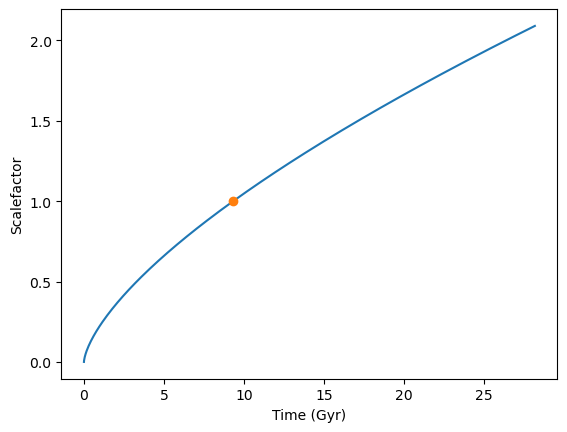

In [5]:
# First set up an array of times (initially all set to zero) into which we'll put our calculated times
t_Gyr = np.zeros(len(a_arr))  # len(a_arr) gives the length of the a_arr 

# Make a loop and do that integral for every final value of a (starting at a=0 every time)
for i,a_end in enumerate(a_arr): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv_flatmatter,0,a_end)
    t_Gyr[i] = t_Hubble/H0y

# It's good practise to compare it to the analytic calculation when available
t_analytic_Gyr = 'Add the analytic equation from above here (and uncomment the plotting line for it below)'
    
plt.plot(t_Gyr,a_arr)
plt.plot(age_Gyr, 1.0,'o') # Put a dot at the current time
#plt.plot(t_analytic_Gyr, a_arr,':',color='red')
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

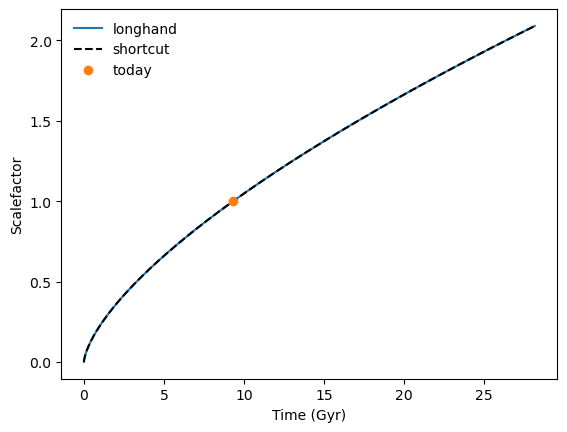

In [6]:
# You might be interested to know that python has some shortcuts.  The whole step above (except the plotting) can be done in one line:
t2_Gyr = np.array([integrate.quad(adotinv_flatmatter, 0, a_end)[0] for a_end in a_arr])/H0y

plt.plot(t_Gyr,a_arr,label='longhand') # Plot original from above
plt.plot(t2_Gyr,a_arr,'--',color='black',label='shortcut') # Plot new one-line calculation to show it is the same
#plt.plot(t_analytic_Gyr, a_arr,':',color='red',label='analytic')
plt.plot(age_Gyr, 1.0,'o',label='today') # Put a dot at the current time
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(frameon=False)
plt.show()

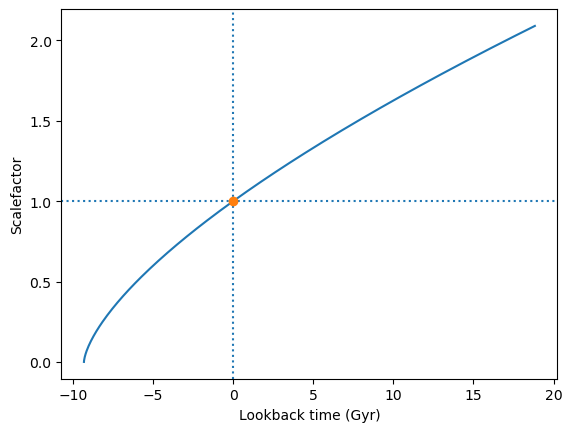

In [7]:
t_lookback_Gyr = np.array([integrate.quad(adotinv_flatmatter, 1, a_end)[0] for a_end in a_arr])/H0y

# Uncomment the commands below to plot your result
plt.plot(t_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.plot(0.0, 1.0,'o') # Put a dot at the current time
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

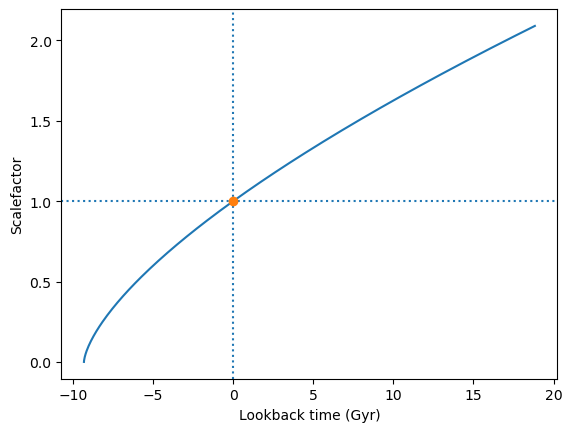

In [8]:
# First calculate the index corresponding to a=1.0.  (Find when |a-1.0| is minimum.  
# You could also do this by just redoing the integral from 0<a<1, but the way I've set it up above we know we have an a=1 
# in the array, so we can just find what we've already calculated.)
index_today = np.argmin(np.abs(a_arr - 1.0))


# Then find the time corresponding to that index  (note you do NOT have to do the integral again)
age_today = t2_Gyr.item(index_today)

t2_lookback_Gyr = t2_Gyr - age_today

# Uncomment the commands below to plot your result
plt.plot(t2_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.plot(0.0, 1.0,'o') # Put a dot at the current time
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

In [9]:
#1.3 More complex function plot

# First write a function that takes as input a, Omega_M (om), and Omega_Lambda (ol) and outputs 1/adot
om = 0.1
ol = 1.3
def adotinv(a,om,ol):
    adot= a*np.sqrt(om*a**(-3) + (1-om-ol)*a**(-2) + ol)
    return 1.0/adot

# Calculate for the universe we think we live in, with approximately matter density 0.3 and cosmological constant 0.7

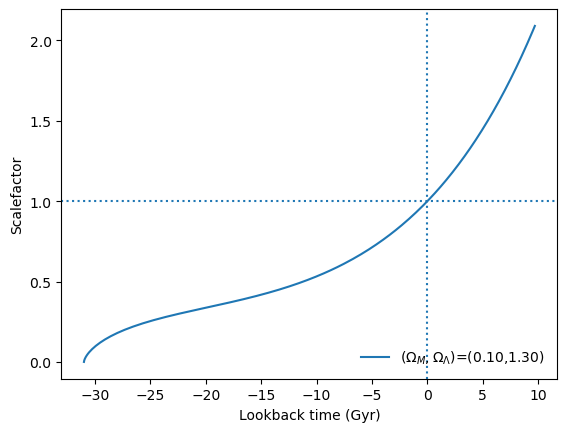

In [10]:
# Calculate for the universe we think we live in, with approximately matter density 0.3 and cosmological constant 0.7
om = 0.1
ol = 1.3

# Note that when you integrate something with more than one argument you pass it with args=(arg1,arg2) in the integrate function
# e.g. "integrate.quad(adotinv, lower_limit, uper_limit, args=(om,ol))""
t_lookback_Gyr =  np.array([integrate.quad(adotinv, 1, a_end,args=(om,ol))[0] for a_end in a_arr])/H0y

# Uncomment these commands to plot this new model (note I've added a label that can be used in the legend)
plt.plot(t_lookback_Gyr,a_arr,label='$(\Omega_M,\Omega_\Lambda)$=(%.2f,%.2f)'%(om,ol)) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

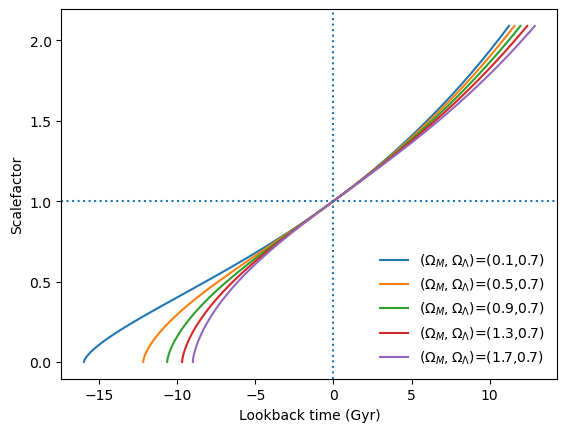

In [11]:
#plot many universes in one graph
om_arr = np.arange(0.1,2.1,0.4)
ol = 0.7

for om in om_arr:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol))
    
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

C:\Users\april\AppData\Local\Temp\ipykernel_22172\3580520408.py:7: RuntimeWarning: invalid value encountered in sqrt
  adot= a*np.sqrt(om*a**(-3) + (1-om-ol)*a**(-2) + ol)
C:\Users\april\AppData\Local\Temp\ipykernel_22172\334174861.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol))[0] for a_end in a_arr])/H0y


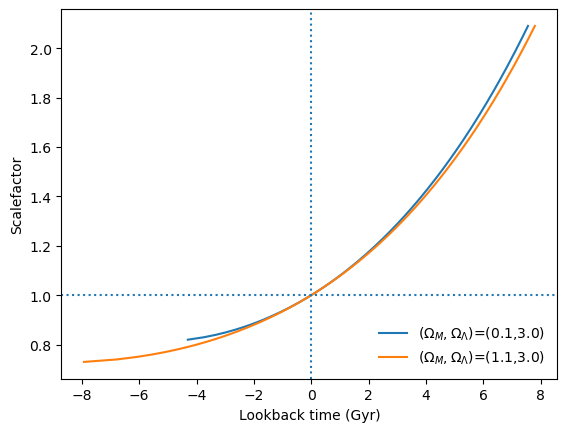

In [28]:
#Fixing cosmological constant and changing matter density

om_arr = np.arange(0.1,2.1,1)
ol = 3

for om in om_arr:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol))
    
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

C:\Users\april\AppData\Local\Temp\ipykernel_22172\3580520408.py:7: RuntimeWarning: invalid value encountered in sqrt
  adot= a*np.sqrt(om*a**(-3) + (1-om-ol)*a**(-2) + ol)
C:\Users\april\AppData\Local\Temp\ipykernel_22172\3868319110.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol1))[0] for a_end in a_arr])/H0y
C:\Users\april\AppData\Local\Temp\ipykernel_22172\3868319110.py:14: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol2))[0] for a_end in a_arr])/H0y


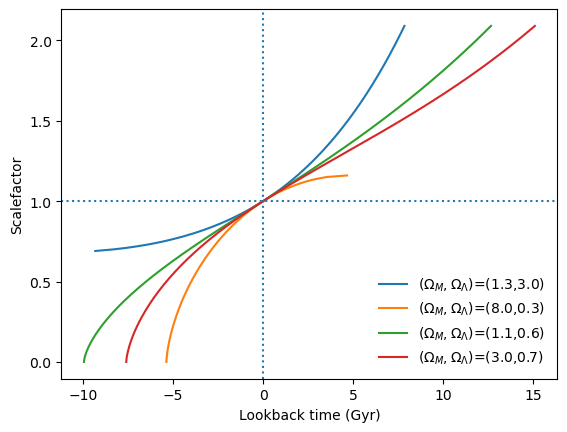

In [26]:
#Overplot of all universe types

#Plot of no big bang universe om = 1.3, ol = 3
om_arr1 = np.arange(1.3,2.3,1)
ol1 = 3
for om in om_arr1:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol1))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol1))

#Plot of recollapse universe om = 8.0, ol = 0.3
om_arr2 = np.arange(8,9,1)
ol2 = 0.3
for om in om_arr2:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol2))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol2))

#Plot of regular universe om = 1.1, ol = 0.6
om_arr3 = np.arange(1.1,2.1,1)
ol3 = 0.6
for om in om_arr3:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol3))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol3))

#Plot of regular universe om = 3.0, ol = 0.7
om_arr4 = np.arange(3,4,1)
ol4 = 0.7
for om in om_arr4:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol4))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol4))
    
#om_arr4 = np.arange(4.1,5.1,1)
#ol4 = 0.37

#for om in om_arr4:
   # t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol4))[0] for a_end in a_arr])/H0y
   # plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol4))

    
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

C:\Users\april\AppData\Local\Temp\ipykernel_22172\3580520408.py:7: RuntimeWarning: invalid value encountered in sqrt
  adot= a*np.sqrt(om*a**(-3) + (1-om-ol)*a**(-2) + ol)
C:\Users\april\AppData\Local\Temp\ipykernel_22172\1833921888.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol1))[0] for a_end in a_arr])/H0y
C:\Users\april\AppData\Local\Temp\ipykernel_22172\1833921888.py:14: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol2))[0] for a_end in a_arr])/H0y


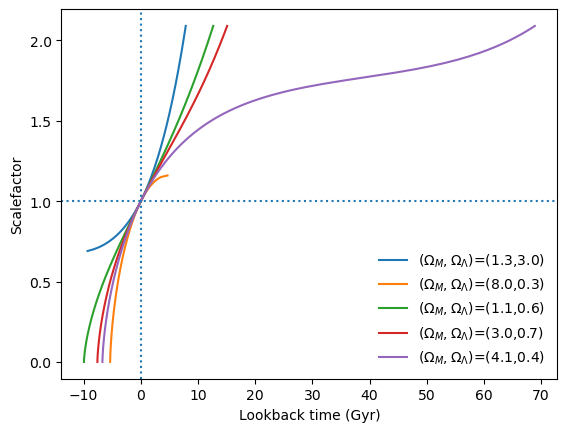

In [29]:
#Overplot including loitering galaxy 

#Plot of no big bang universe om = 1.3, ol = 3
om_arr1 = np.arange(1.3,2.3,1)
ol1 = 3
for om in om_arr1:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol1))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol1))

#Plot of recollapse universe om = 8.0, ol = 0.3
om_arr2 = np.arange(8,9,1)
ol2 = 0.3
for om in om_arr2:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol2))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol2))

#Plot of regular universe om = 1.1, ol = 0.6
om_arr3 = np.arange(1.1,2.1,1)
ol3 = 0.6
for om in om_arr3:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol3))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol3))

#Plot of regular universe om = 1.1, ol = 0.6
om_arr4 = np.arange(3,4,1)
ol4 = 0.7
for om in om_arr4:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol4))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol4))

#Loitering Universe Plot om = 4.1, ol = 0.37

om_arr4 = np.arange(4.1,5.1,1)
ol4 = 0.37

for om in om_arr4:
    t_lookback_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol4))[0] for a_end in a_arr])/H0y
    plt.plot(t_lookback_Gyr,a_arr,label='($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(om,ol4))

    
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()